In [1]:
from google.colab import files

uploaded = files.upload()

Saving Cars Images.rar to Cars Images.rar


Part 3)
i)Importing the car images in the code line above.

ii) Extracting the images from the rar folder.

In [2]:
!pip install unrar
!unrar x '/content/Cars Images.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Cars Images.rar

Creating    Cars Images                                               OK
Extracting  Cars Images/00001.jpg                                          2%  OK 
Extracting  Cars Images/00002.jpg                                          5%  7% 10% 12% 15% 18% 20% 22%  OK 
Extracting  Cars Images/00003.jpg                                         28%  OK 
Extracting  Cars Images/00004.jpg                                         30% 33% 34%  OK 
Extracting  Cars Images/00005.jpg                                         34%  OK 
Extracting  Cars Images/00006.jpg                                         38%  OK 
Extracting  Cars Images/00007.jpg                                         41% 44% 46% 47%  OK 
Extracting  Cars Images/00008.jpg                                        

Importing the necessary libraries:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
import keras
from keras.layers import Dense,Conv2D,Dropout,BatchNormalization,Activation,Flatten,MaxPool2D,Input,LeakyReLU
from keras.models import Sequential
from keras.activations import relu
from keras.optimizers import Adam,RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from sklearn import svm
from keras.preprocessing import image
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
import cv2
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as sk
%matplotlib inline
import h5py

In [7]:
from tensorflow.keras.utils import to_categorical

Importing the stanford cars dataset to train a car classifier in order to predict the car images provided in the question and append the predicted labels to create the dataset:

In [3]:
! mkdir data
# Download train dataset and extract it
! wget "http://ai.stanford.edu/~jkrause/car196/cars_train.tgz"
! tar -xvf 'cars_train.tgz' -C 'data'
# Download test dataset and extract it
! wget "http://ai.stanford.edu/~jkrause/car196/cars_test.tgz"
! tar -xvf 'cars_test.tgz' -C 'data'
# Download the devkit and extract it
! wget "https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz"
! tar -xvf 'car_devkit.tgz' -C 'data'

Streaming output truncated to the last 5000 lines.
cars_test/03060.jpg
cars_test/03061.jpg
cars_test/03062.jpg
cars_test/03063.jpg
cars_test/03064.jpg
cars_test/03065.jpg
cars_test/03066.jpg
cars_test/03067.jpg
cars_test/03068.jpg
cars_test/03069.jpg
cars_test/03070.jpg
cars_test/03071.jpg
cars_test/03072.jpg
cars_test/03073.jpg
cars_test/03074.jpg
cars_test/03075.jpg
cars_test/03076.jpg
cars_test/03077.jpg
cars_test/03078.jpg
cars_test/03079.jpg
cars_test/03080.jpg
cars_test/03081.jpg
cars_test/03082.jpg
cars_test/03083.jpg
cars_test/03084.jpg
cars_test/03085.jpg
cars_test/03086.jpg
cars_test/03087.jpg
cars_test/03088.jpg
cars_test/03089.jpg
cars_test/03090.jpg
cars_test/03091.jpg
cars_test/03092.jpg
cars_test/03093.jpg
cars_test/03094.jpg
cars_test/03095.jpg
cars_test/03096.jpg
cars_test/03097.jpg
cars_test/03098.jpg
cars_test/03099.jpg
cars_test/03100.jpg
cars_test/03101.jpg
cars_test/03102.jpg
cars_test/03103.jpg
cars_test/03104.jpg
cars_test/03105.jpg
cars_test/03106.jpg
cars_test

In [ ]:
! wget "https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz"
! tar -xvf 'car_devkit.tgz' -C 'data'

--2021-05-23 20:53:33--  https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330960 (323K) [application/x-gzip]
Saving to: ‘car_devkit.tgz.2’

car_devkit.tgz.2    100%[===================>] 323.20K   949KB/s    in 0.3s    

2021-05-23 20:53:33 (949 KB/s) - ‘car_devkit.tgz.2’ saved [330960/330960]

devkit/
devkit/cars_meta.mat
devkit/cars_train_annos.mat
devkit/cars_test_annos.mat
devkit/README.txt
devkit/train_perfect_preds.txt
devkit/eval_train.m


In [19]:
from scipy import io  

In [ ]:
from scipy import io                   # Required to load .mat file

class_name = io.loadmat('./data/devkit/cars_meta.mat')

In [ ]:
combined = []
for name in class_name['class_names'][0]:
  name=name.flat[0]
  splits = name.split(" ")
  make = splits[0]                     # First word
  year = splits[len(splits)-1]         # Last word
  model = ""
  for tmp in splits[1:len(splits)-2]:
    model = model + tmp + "_"          # Replace spaces with '_'
  combined.append([make, model, year])

In [ ]:
combined

[['AM', 'General_Hummer_', '2000'],
 ['Acura', 'RL_', '2012'],
 ['Acura', 'TL_', '2012'],
 ['Acura', 'TL_', '2008'],
 ['Acura', 'TSX_', '2012'],
 ['Acura', 'Integra_Type_', '2001'],
 ['Acura', 'ZDX_', '2012'],
 ['Aston', 'Martin_V8_Vantage_', '2012'],
 ['Aston', 'Martin_V8_Vantage_', '2012'],
 ['Aston', 'Martin_Virage_', '2012'],
 ['Aston', 'Martin_Virage_', '2012'],
 ['Audi', 'RS_4_', '2008'],
 ['Audi', 'A5_', '2012'],
 ['Audi', 'TTS_', '2012'],
 ['Audi', 'R8_', '2012'],
 ['Audi', 'V8_', '1994'],
 ['Audi', '100_', '1994'],
 ['Audi', '100_', '1994'],
 ['Audi', 'TT_', '2011'],
 ['Audi', 'S6_', '2011'],
 ['Audi', 'S5_', '2012'],
 ['Audi', 'S5_', '2012'],
 ['Audi', 'S4_', '2012'],
 ['Audi', 'S4_', '2007'],
 ['Audi', 'TT_RS_', '2012'],
 ['BMW', 'ActiveHybrid_5_', '2012'],
 ['BMW', '1_Series_', '2012'],
 ['BMW', '1_Series_', '2012'],
 ['BMW', '3_Series_', '2012'],
 ['BMW', '3_Series_', '2012'],
 ['BMW', '6_Series_', '2007'],
 ['BMW', 'X5_', '2007'],
 ['BMW', 'X6_', '2012'],
 ['BMW', 'M3_', 

In [ ]:
import pandas as pd                     # To create csv files

labels = io.loadmat('./data/devkit/cars_train_annos.mat')
data = [[row.flat[0] for row in line][4:] for line in labels['annotations'][0]]
make = [[row[1],combined[row[0]-1][0]] for row in data]
model= [[row[1],combined[row[0]-1][1]] for row in data]
year = [[row[1],combined[row[0]-1][2]] for row in data]

df = pd.DataFrame(make, columns = ['ID', 'Labels'])
df.to_csv("vehicles_make.csv", index = False)
df = pd.DataFrame(model, columns = ['ID', 'Labels'])
df.to_csv("vehicles_model.csv", index = False)
df = pd.DataFrame(year, columns = ['ID', 'Labels'])
df.to_csv("vehicles_year.csv", index = False)

In [ ]:
import os
import random
import shutil
import tarfile

import cv2 as cv
import numpy as np
import scipy.io
from tqdm import tqdm

Preprocessing the images present in the Stanford Dataset:
i)The metadata of this file contains the bounding box coordinated which are used to create bounding boxes around the car that is to be predicted.
ii) The images are resized.

In [ ]:
def ensure_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)


def save_train_data(fnames, labels, bboxes):
    src_folder = '/content/data/cars_train'
    num_samples = len(fnames)

    train_split = 0.8
    num_train = int(round(num_samples * train_split))
    train_indexes = random.sample(range(num_samples), num_train)

    for i in tqdm(range(num_samples)):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]

        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print("{} -> {}".format(fname, label))

        if i in train_indexes:
            dst_folder = 'data/train'
        else:
            dst_folder = 'data/valid'

        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)

        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)


def save_test_data(fnames, bboxes):
    src_folder = '/content/data/cars_test'
    dst_folder = 'data/test'
    num_samples = len(fnames)

    for i in tqdm(range(num_samples)):
        fname = fnames[i]
        (x1, y1, x2, y2) = bboxes[i]
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print(fname)

        dst_path = os.path.join(dst_folder, fname)
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)


def process_train_data():
    print("Processing train data...")
    cars_annos = scipy.io.loadmat('/content/data/devkit/cars_train_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    class_ids = []
    bboxes = []
    labels = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        labels.append('%04d' % (class_id,))
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)

    labels_count = np.unique(class_ids).shape[0]
    print(np.unique(class_ids))
    print('The number of different cars is %d' % labels_count)

    save_train_data(fnames, labels, bboxes)


def process_test_data():
    print("Processing test data...")
    cars_annos = scipy.io.loadmat('/content/data/devkit/cars_test_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    bboxes = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        fname = annotation[0][4][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        fnames.append(fname)

    save_test_data(fnames, bboxes)


In [ ]:
img_width, img_height = 224, 224
cars_meta = scipy.io.loadmat('./data/devkit/cars_meta.mat')
class_names = cars_meta['class_names']  # shape=(1, 196)
class_names = np.transpose(class_names)
print('class_names.shape: ' + str(class_names.shape))
print('Sample class_name: [{}]'.format(class_names[8][0][0]))

ensure_folder('data/train')
ensure_folder('data/valid')
ensure_folder('data/test')

process_train_data()
process_test_data()



class_names.shape: (196, 1)
Sample class_name: [Aston Martin V8 Vantage Coupe 2012]
Processing train data...


  0%|          | 7/8144 [00:00<02:02, 66.60it/s]

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196]
The number of different cars is 196


  0%|          | 0/8041 [00:00<?, ?it/s]

Processing test data...


100%|██████████| 8041/8041 [01:03<00:00, 126.21it/s]


In [ ]:
# clean up
shutil.rmtree('/content/data/train')
shutil.rmtree('/content/data/test')
shutil.rmtree('/content/data/valid')
# shutil.rmtree('devkit')

In [ ]:
from keras.optimizers import SGD
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Flatten, Activation, add
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import backend as K

from sklearn.metrics import log_loss

#from custom_layers.scale_layer import Scale

import sys

In [ ]:
file_share_link='https://drive.google.com/file/d/0Byy2AcGyEVxfeXExMzNNOHpEODg/view?usp=sharing'
file_id = file_share_link[file_share_link.find("=") + 1:]

In [ ]:
file_id

'sharing'

In [ ]:
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id 

In [ ]:
https://drive.google.com/file/d/1zPDuHQMib7eQsUhE3p_paEF95eQ3bMEx/view?usp=sharing

In [ ]:
!gdown --id 0Byy2AcGyEVxfeXExMzNNOHpEODg&export=download

Downloading...
From: https://drive.google.com/uc?id=0Byy2AcGyEVxfeXExMzNNOHpEODg
To: /content/resnet152_weights_tf.h5
243MB [00:02, 110MB/s]


In [7]:
!gdown --id 1zPDuHQMib7eQsUhE3p_paEF95eQ3bMEx&export=download

Downloading...
From: https://drive.google.com/uc?id=1zPDuHQMib7eQsUhE3p_paEF95eQ3bMEx
To: /content/trained_model_cars.hdf5
134MB [00:00, 142MB/s]


In [ ]:
! mkdir models
# Download train dataset and extract it
! wget "https://drive.google.com/u/0/uc?export=download&confirm=jA8c&id=0Byy2AcGyEVxfeXExMzNNOHpEODg"

mkdir: cannot create directory ‘models’: File exists
--2021-05-24 08:56:38--  https://drive.google.com/u/0/uc?export=download&confirm=jA8c&id=0Byy2AcGyEVxfeXExMzNNOHpEODg
Resolving drive.google.com (drive.google.com)... 74.125.124.113, 74.125.124.101, 74.125.124.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.124.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘uc?export=download&confirm=jA8c&id=0Byy2AcGyEVxfeXExMzNNOHpEODg’

uc?export=download&     [ <=>                ]   3.21K  --.-KB/s    in 0s      

2021-05-24 08:56:38 (37.7 MB/s) - ‘uc?export=download&confirm=jA8c&id=0Byy2AcGyEVxfeXExMzNNOHpEODg’ saved [3291]



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau

In [ ]:
!pip install efficientnet

     |████████████████████████████████| 51kB 2.8MB/s 


The preprocessed train images are trained using the efficient net neural network architecture:

In [6]:
import os
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import keras
import pandas as pd
from PIL import Image
import cv2

from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from keras.applications.imagenet_utils import decode_predictions
import efficientnet.keras as efficientnet 
from efficientnet.keras import EfficientNetB0,EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input
from keras.optimizers import SGD, Adam

In [5]:
!pip install -U efficientnet

     |████████████████████████████████| 51kB 2.9MB/s 


In [ ]:
def plot_loss_acc(history):
    plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'][1:])    
    plt.plot(history.history['val_loss'][1:])    
    plt.title('model loss')    
    plt.ylabel('val_loss')    
    plt.xlabel('epoch')    
    plt.legend(['Train','Validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['acc'][1:])
    plt.plot(history.history['val_acc'][1:])
    plt.title('Model Accuracy')
    plt.ylabel('val_acc')
    plt.xlabel('epoch')
    plt.legend(['Train','Validation'], loc='upper left')
    plt.show()



```
# This is formatted as code
```



Defining the snapshot callback scheduler:
Here, the cyclic annealing scheduler is used wherein the models obtained from training in specific number of epochs are ensembled to combine different local minima and the learning rates at these minima.
At the starting of each epoch for each model,a very large learning rate is set following which it decreases rapidly through the defined number of epochs for the model. In this way different local minima can be obtained and combined together to obtain a more optimal converge point.
The weights of the last 3 epochs in the entire training time are averaged together.

In [ ]:
class SnapshotCallbackBuilder:
    def __init__(self, nb_epochs, nb_snapshots, init_lr=0.1):
        self.T = nb_epochs
        self.M = nb_snapshots
        self.alpha_zero = init_lr

    def get_callbacks(self, model_prefix='Model'):

        callback_list = [
#             callbacks.ModelCheckpoint("./keras.model",monitor='val_loss', 
#                                    mode = 'min', save_best_only=True, verbose=1),
            swa,
            callbacks.LearningRateScheduler(schedule=self._cosine_anneal_schedule)
        ]

        return callback_list

    def _cosine_anneal_schedule(self, t):
        cos_inner = np.pi * (t % (self.T // self.M))  # t - 1 is used when t has 1-based indexing.
        cos_inner /= self.T // self.M
        cos_out = np.cos(cos_inner) + 1
        return float(self.alpha_zero / 2 * cos_out)

import keras.callbacks as callbacks

class SWA(keras.callbacks.Callback):
    
    def __init__(self, filepath, swa_epoch):
        super(SWA, self).__init__()
        self.filepath = filepath
        self.swa_epoch = swa_epoch 
    
    def on_train_begin(self, logs=None):
        self.nb_epoch = self.params['epochs']
        print('Stochastic weight averaging selected for last {} epochs.'
              .format(self.nb_epoch - self.swa_epoch))
        
    def on_epoch_end(self, epoch, logs=None):
        
        if epoch == self.swa_epoch:
            self.swa_weights = self.model.get_weights()
            
        elif epoch > self.swa_epoch:    
            for i in range(len(self.swa_weights)):
                self.swa_weights[i] = (self.swa_weights[i] * 
                    (epoch - self.swa_epoch) + self.model.get_weights()[i])/((epoch - self.swa_epoch)  + 1)  

        else:
            pass
        
    def on_train_end(self, logs=None):
        self.model.set_weights(self.swa_weights)
        print('Final model parameters set to stochastic weight average.')
        self.model.save_weights(self.filepath)
        print('Final stochastic averaged weights saved to file.')

Defining the image data generator to generate augmented images for train,test and validation sets respectively:

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=20.,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=[0.9, 1.25],
        brightness_range=[0.5, 1.5],
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './data/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        './data/valid',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 6515 images belonging to 196 classes.
Found 1629 images belonging to 196 classes.


In [7]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model
from keras.layers.pooling import MaxPooling2D,AveragePooling2D

Defining the fully connected layer to be trained following the efficientnet transfer learning architecture:

In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model
from keras.layers.pooling import MaxPooling2D,AveragePooling2D
def build_finetune_model(base_model, dropout, num_classes):

    x = base_model.output
    
    x = AveragePooling2D((5, 5), name='avg_pool')(x)
    x = Flatten()(x)
    x = Dropout(dropout)(x)
    predictions = Dense(num_classes, activation='softmax', name='finalfc')(x)
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model

Building the model and fitting on the trainset:

In [ ]:
HEIGHT = 224
WIDTH = 224

input_shape=(HEIGHT, WIDTH, 3)

dropout = 0.7
epochs = 100
swa = SWA('./keras_swa.model',epochs-3)

base_model = EfficientNetB3(weights='imagenet',
                            include_top=False,
                            input_shape=(HEIGHT, WIDTH, 3))

finetune_model = build_finetune_model(base_model, 
                                      dropout=dropout, 
                                      num_classes=196)

finetune_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

snapshot = SnapshotCallbackBuilder(nb_epochs=epochs,nb_snapshots=1,init_lr=1e-3)

history = finetune_model.fit_generator(generator=train_generator,
                                        validation_data=validation_generator,
                                        steps_per_epoch=150,
                                        epochs=epochs,verbose=2,validation_steps=55,callbacks=snapshot.get_callbacks())

try:
    finetune_model.load_weights('./keras_swa.model')
except Exception as e:
    print(e)

44113920/44107200 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Stochastic weight averaging selected for last 3 epochs.
Epoch 1/100
150/150 - 138s - loss: 5.2496 - accuracy: 0.0161 - val_loss: 4.8227 - val_accuracy: 0.0411
Epoch 2/100
150/150 - 83s - loss: 4.3034 - accuracy: 0.0940
Epoch 3/100
150/150 - 83s - loss: 3.1305 - accuracy: 0.2503
Epoch 4/100
150/150 - 83s - loss: 2.2384 - accuracy: 0.4256
Epoch 5/100
150/150 - 83s - loss: 1.6601 - accuracy: 0.5421
Epoch 6/100
150/150 - 83s - loss: 1.3005 - accuracy: 0.6386
Epoch 7/100
150/150 - 83s - loss: 1.0605 - accuracy: 0.6988
Epoch 8/100
150/150 - 83s - loss: 0.8621 - accuracy: 0.7500
Epoch 9/100
150/150 - 83s - loss: 0.7323 - accuracy: 0.7844
Epoch 10/100
150/150 - 83s - loss: 0.6849 - accuracy: 0.7959
Epoch 11/100
150/150 - 83s - loss: 0.5525 - accuracy: 0.8400
Epoch 12/100
150/150 - 82s - loss: 0.5210 - accuracy: 0.8435
Epoch 13/100
150/150 - 83s - loss: 0.4741 - accuracy: 0.8598
Epoch 14/100
150/150 - 83s - loss: 0.4036 - accuracy: 0.8767
Epoch 15/100
150/150 - 82s - loss: 0.3718 - accuracy: 0.

In [ ]:
Obtaining the accuracy of the predictions on the validation data:
An accuracy of 90.5% is obtained.

In [ ]:
finetune_model.evaluate(validation_generator)

51/51 [==============================] - 6s 110ms/step - loss: 0.6363 - accuracy: 0.9055


[0.6362898349761963, 0.905463457107544]

In [ ]:
model=finetune_model.load_weights('./keras_swa.model')

In [ ]:
finetune_model.evaluate(validation_generator)

51/51 [==============================] - 6s 110ms/step - loss: 0.6363 - accuracy: 0.9055


[0.6362897157669067, 0.905463457107544]

In [ ]:
Saving the model:

In [ ]:
finetune_model.save("trained_model_cars.hdf5")

In [ ]:
test_generator = test_datagen.flow_from_directory(
        './data/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 0 images belonging to 0 classes.


In [ ]:
test_fnames=os.listdir('./data/test')

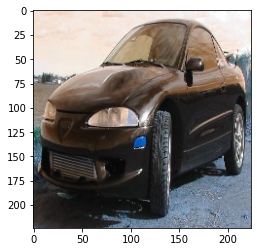

97


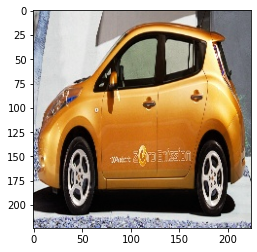

167


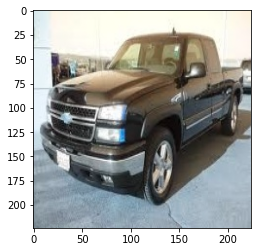

69


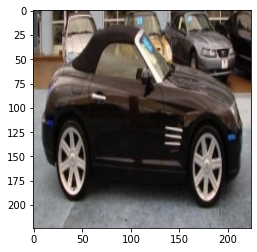

79


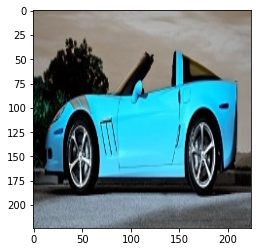

54


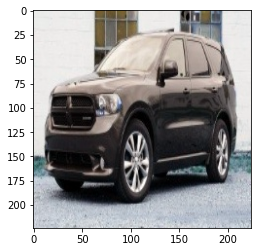

93


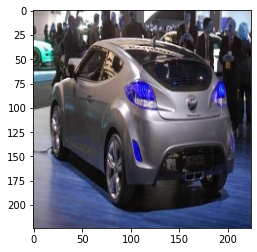

129


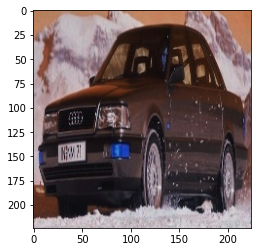

16


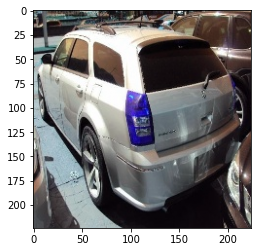

91


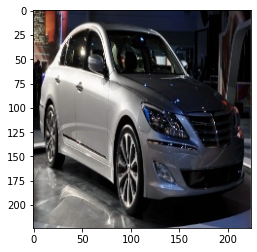

136


In [ ]:
for i in test_fnames[0:10]:
  img=cv.imread('./data/test/'+i)
  img=img/255
  plt.imshow(img)
  plt.show()
  img1=img.reshape(1,224,224,3)
  y_pred=finetune_model.predict(img1)
  print(np.argmax(y_pred))


In [ ]:
img=cv.imread('/content/data/test/00001.jpg')

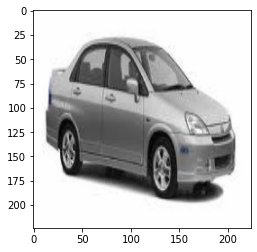

In [ ]:
plt.imshow(img)

In [ ]:
img.shape
img1=img.reshape(1,224,224,3)

In [ ]:
img1=img1/255

In [ ]:
y_pred=finetune_model.predict(img1)

In [ ]:
'./data/test/'+i

'./data/test/07465.jpg'

In [12]:
import cv2 as cv

In [12]:
!mkdir data


In [9]:
os.makedirs('./data/test')

Using the car images provided in the question to predict the labels using the trained model and append these labels in order to create the dataset:

i) Preprocessing the test images:

In [13]:
src_folder = '/content/Cars Images'
dst_folder = './data/test'
fnames=os.listdir(src_folder)
num_samples = len(fnames)

for i in range(num_samples):
    fname = fnames[i]
    #(x1, y1, x2, y2) = bboxes[i]
    src_path = os.path.join(src_folder, fname)
    src_image = cv.imread(src_path)
    height, width = 224,224
    # margins of 16 pixels
    #margin = 16
    #x1 = max(0, x1 - margin)
    #y1 = max(0, y1 - margin)
    #x2 = min(x2 + margin, width)
    #y2 = min(y2 + margin, height)
    # print(fname)

    dst_path = os.path.join(dst_folder, fname)
    #crop_image = src_image[y1:y2, x1:x2]
    dst_img = cv.resize(src_image, dsize=(224, 224))
    cv.imwrite(dst_path, dst_img)

Loading the saved model:

In [ ]:
!gdown --id 1zPDuHQMib7eQsUhE3p_paEF95eQ3bMEx&export=download

Downloading...
From: https://drive.google.com/uc?id=1zPDuHQMib7eQsUhE3p_paEF95eQ3bMEx
To: /content/trained_model_cars.hdf5
134MB [00:00, 142MB/s]


In [8]:
model=keras.models.load_model('/content/trained_model_cars.hdf5')

Predicting the labels of the car images:

./data/test/00012.jpg


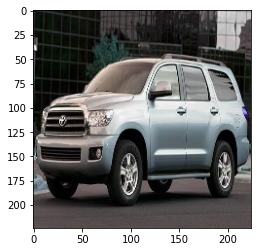

185
./data/test/00013.jpg


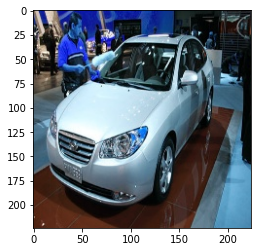

134
./data/test/00005.jpg


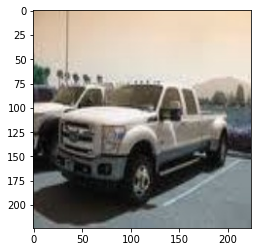

105
./data/test/00010.jpg


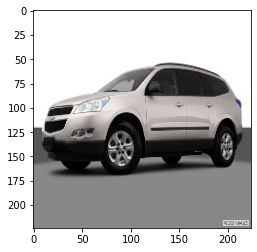

57
./data/test/00008.jpg


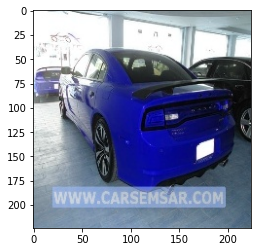

95
./data/test/00007.jpg


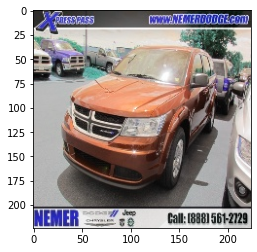

88
./data/test/00015.jpg


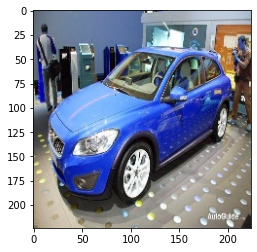

192
./data/test/00011.jpg


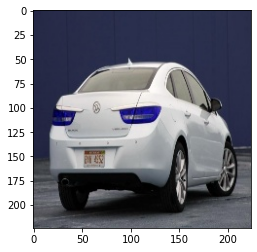

48
./data/test/00003.jpg


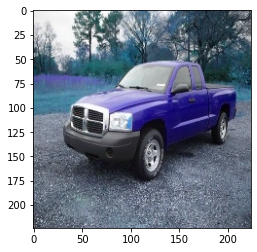

90
./data/test/00009.jpg


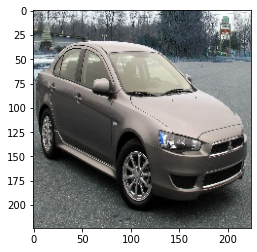

166
./data/test/00006.jpg


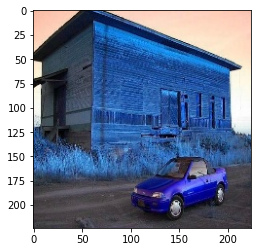

123
./data/test/00014.jpg


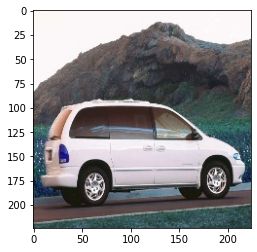

126
./data/test/00001.jpg


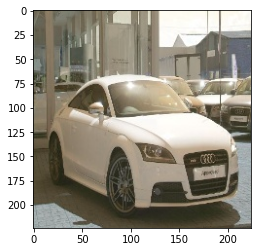

13
./data/test/00002.jpg


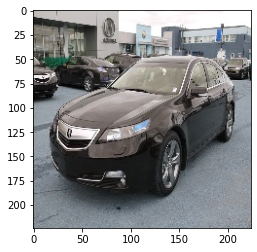

2
./data/test/00004.jpg


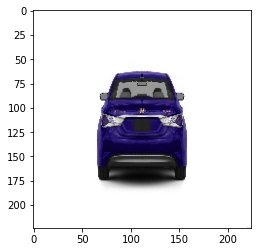

26


In [15]:
src_folder = './data/test'
#dst_folder = './data/test'
fnames=os.listdir(src_folder)
num_samples = len(fnames)
fnames1=[]
labels=[]
for i in range(num_samples):
    fname = fnames[i]
    #(x1, y1, x2, y2) = bboxes[i]
    src_path = os.path.join(src_folder, fname)
    print(src_path)
    src_image = cv.imread(src_path)
    plt.imshow(src_image)
    plt.show()
    src_image=src_image.reshape(1,224,224,3)
    src_image=src_image/255
    y_pred=model.predict(src_image)
    print(np.argmax(y_pred))
    fnames1.append(src_path)
    labels.append(np.argmax(y_pred))

./data/test/00011.jpg


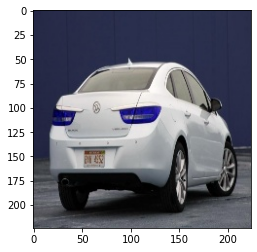

48
./data/test/00009.jpg


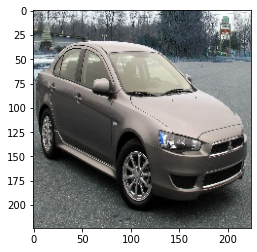

166
./data/test/00006.jpg


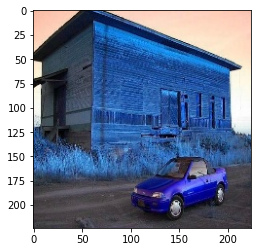

123
./data/test/00008.jpg


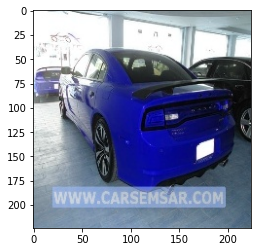

95
./data/test/00012.jpg


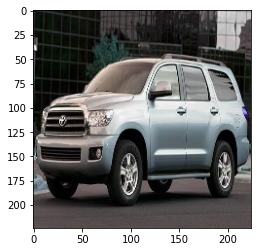

185
./data/test/00003.jpg


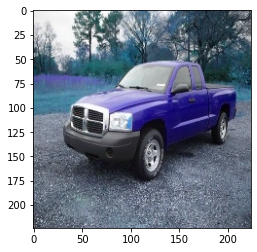

90
./data/test/00002.jpg


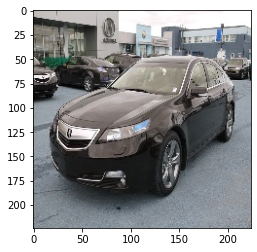

2
./data/test/00005.jpg


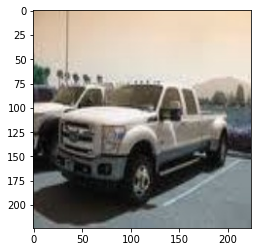

105
./data/test/00010.jpg


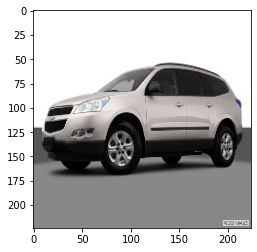

57
./data/test/00013.jpg


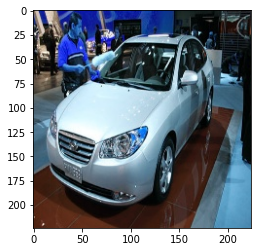

134
./data/test/00004.jpg


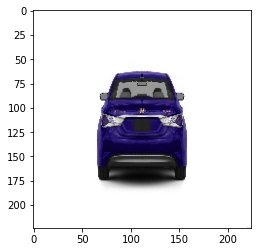

26
./data/test/00015.jpg


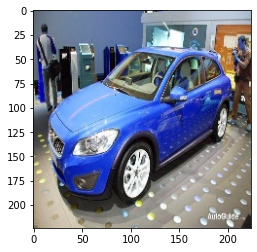

192
./data/test/00007.jpg


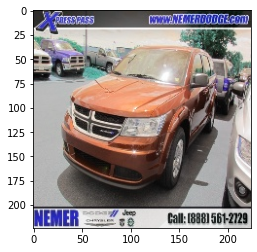

88
./data/test/00014.jpg


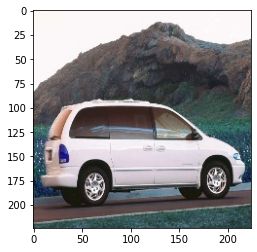

126
./data/test/00001.jpg


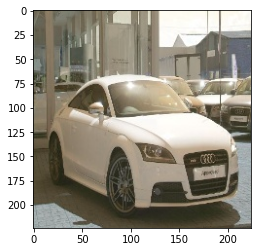

13


In [14]:
src_folder = './data/test'
#dst_folder = './data/test'
fnames=os.listdir(src_folder)
num_samples = len(fnames)
fnames1=[]
labels=[]
for i in range(num_samples):
    fname = fnames[i]
    #(x1, y1, x2, y2) = bboxes[i]
    src_path = os.path.join(src_folder, fname)
    print(src_path)
    src_image = cv.imread(src_path)
    plt.imshow(src_image)
    plt.show()
    src_image=src_image.reshape(1,224,224,3)
    src_image=src_image/255
    y_pred=model.predict(src_image)
    print(np.argmax(y_pred))
    fnames1.append(src_path)
    labels.append(np.argmax(y_pred))

In [15]:
from scipy import io

In [17]:
cars_annos = io.loadmat('/content/data/devkit/cars_train_annos.mat')
annotations = cars_annos['annotations']

In [ ]:
cars_annos

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 'annotations': array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
         (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
         (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
         ...,
         (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9')),
         (array([[78]], dtype=uint8), array([[526]], dtype=uint16), 

Loading the class names for each class corresponding to the predicted class using the meta data provided along with the stanford cars dataset:

In [21]:
class_name = io.loadmat('/content/data/devkit/cars_meta.mat')

In [21]:
class_name['class_names'][0][95]

array(['Dodge Charger Sedan 2012'], dtype='<U24')

In [18]:
fnames1

['./data/test/00011.jpg',
 './data/test/00009.jpg',
 './data/test/00006.jpg',
 './data/test/00008.jpg',
 './data/test/00012.jpg',
 './data/test/00003.jpg',
 './data/test/00002.jpg',
 './data/test/00005.jpg',
 './data/test/00010.jpg',
 './data/test/00013.jpg',
 './data/test/00004.jpg',
 './data/test/00015.jpg',
 './data/test/00007.jpg',
 './data/test/00014.jpg',
 './data/test/00001.jpg']

In [19]:
labels

[48, 166, 123, 95, 185, 90, 2, 105, 57, 134, 26, 192, 88, 126, 13]

In [27]:
sep_details=class_name['class_names'][0][105][0].split(' ')

In [28]:
sep_details

['Ford', 'F-450', 'Super', 'Duty', 'Crew', 'Cab', '2012']

Storing the label names,brand,make,year in separate lists:

In [22]:
label_names=[]
label_brand=[]
label_make=[]
label_year=[]
for i in labels:
  print(i)
  sep_details1=class_name['class_names'][0][i][0]
  sep_details=class_name['class_names'][0][i][0].split(' ')
  label_names.append(sep_details1)
  label_brand.append(sep_details[0])
  label_make.append(sep_details[1])
  label_year.append(sep_details[len(sep_details)-1])

48
166
123
95
185
90
2
105
57
134
26
192
88
126
13


In [ ]:
label_names=[]
label_make=[]
label_year=[]
for i in labels:
  print(i)
  sep_details=class_name['class_names'][0][i][0].split(' ')
  label_names.append(sep_details[0])

57
126
105
26
2
123
88
48
166
90
13
185
134
95
192


In [23]:
label_names

['Buick Verano Sedan 2012',
 'Mitsubishi Lancer Sedan 2012',
 'HUMMER H3T Crew Cab 2010',
 'Dodge Charger Sedan 2012',
 'Toyota Sequoia SUV 2012',
 'Dodge Dakota Club Cab 2007',
 'Acura TL Sedan 2012',
 'Ford F-450 Super Duty Crew Cab 2012',
 'Chevrolet Traverse SUV 2012',
 'Hyundai Elantra Sedan 2007',
 'BMW 1 Series Convertible 2012',
 'Volvo C30 Hatchback 2012',
 'Dodge Journey SUV 2012',
 'Honda Odyssey Minivan 2007',
 'Audi TTS Coupe 2012']

In [25]:
label_make

['Sequoia',
 'Elantra',
 'F-450',
 'Traverse',
 'Charger',
 'Journey',
 'C30',
 'Verano',
 'Dakota',
 'Lancer',
 'H3T',
 'Odyssey',
 'TTS',
 'TL',
 '1']

In [30]:
label_year

['2012',
 '2007',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2007',
 '2012',
 '2010',
 '2007',
 '2012',
 '2012',
 '2012']

Storing the different images in folders corresponding to to their labels:

In [25]:
os.makedirs('./dataset')

In [ ]:
shutil.rmtree('./dataset')

In [26]:
for i in range(len(fnames1)):
  fn=fnames1[i].split('/')[3]
  print(fn)
  print(label_names[i])
  if label_names[i] not in os.listdir('./dataset'):
    dst=os.makedirs('./dataset/'+label_names[i])
  img=cv.imread('/content/Cars Images/'+fn)
  cv.imwrite('./dataset/'+label_names[i]+'/'+fn,img)

00011.jpg
Buick Verano Sedan 2012
00009.jpg
Mitsubishi Lancer Sedan 2012
00006.jpg
HUMMER H3T Crew Cab 2010
00008.jpg
Dodge Charger Sedan 2012
00012.jpg
Toyota Sequoia SUV 2012
00003.jpg
Dodge Dakota Club Cab 2007
00002.jpg
Acura TL Sedan 2012
00005.jpg
Ford F-450 Super Duty Crew Cab 2012
00010.jpg
Chevrolet Traverse SUV 2012
00013.jpg
Hyundai Elantra Sedan 2007
00004.jpg
BMW 1 Series Convertible 2012
00015.jpg
Volvo C30 Hatchback 2012
00007.jpg
Dodge Journey SUV 2012
00014.jpg
Honda Odyssey Minivan 2007
00001.jpg
Audi TTS Coupe 2012


In [ ]:
for i in range(len(fnames1)):
  fn=fnames1[i].split('/')[3]
  print(fn)
  print(label_names[i])
  if label_names[i] not in os.listdir('./dataset'):
    dst=os.makedirs('./dataset/'+label_names[i])
  img=cv.imread('/content/Cars Images/'+fn)
  cv.imwrite('./dataset/'+label_names[i]+'/'+fn,img)
  

00010.jpg
Chevrolet
00014.jpg
Honda
00005.jpg
Ford
00004.jpg
BMW
00002.jpg
Acura
00006.jpg
HUMMER
00007.jpg
Dodge
00011.jpg
Buick
00009.jpg
Mitsubishi
00003.jpg
Dodge
00001.jpg
Audi
00012.jpg
Toyota
00013.jpg
Hyundai
00008.jpg
Dodge
00015.jpg
Volvo


In [ ]:
fnames1[0].split('/')[3]

'00010.jpg'

Augmenting each image provided under each label to generate 100 augmented images for each class:

In [27]:
os.makedirs('./aug_images')

In [37]:
import shutil

In [38]:
shutil.rmtree('./aug_images/')

In [40]:
for label in label_names:
  print(label)
  for i in range(0,100):
    #datagen_kwargs = dict(rescale=1./255)  
    #dataflow_kwargs = dict(target_size=(IMAGE_SIZE, IMAGE_SIZE), 
     #                      batch_size=BATCH_SIZE, interpolation="bilinear")
    #print(i)
    if label not in os.listdir('./aug_images'):
      os.makedirs('./aug_images/'+label)

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=20.,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=[0.9, 1.25],
        brightness_range=[0.5, 1.5],
        horizontal_flip=True)

    train_generator = train_datagen.flow_from_directory(
      './dataset', shuffle=True, save_to_dir='aug_images/'+label, save_prefix='aug', classes=[label])
  
  # Following line triggers execution of train_generator
    train_generator.next() 

Toyota
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images bel

In [29]:

for label in label_names:
  print(label)
  for i in range(0,100):
    #datagen_kwargs = dict(rescale=1./255)  
    #dataflow_kwargs = dict(target_size=(IMAGE_SIZE, IMAGE_SIZE), 
     #                      batch_size=BATCH_SIZE, interpolation="bilinear")
    #print(i)
    if label not in os.listdir('./aug_images'):
      os.makedirs('./aug_images/'+label)

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=20.,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=[0.9, 1.25],
        brightness_range=[0.5, 1.5],
        horizontal_flip=True)

    train_generator = train_datagen.flow_from_directory(
      './dataset', shuffle=True, save_to_dir='aug_images/'+label, save_prefix='aug', classes=[label])
  
  # Following line triggers execution of train_generator
    train_generator.next() 

Buick Verano Sedan 2012
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
F

Obtaining a sample image present in the augmented images and printing the shape:
The shape is found to be 256,256,3 which needs to be resized to 224,224,3.

In [ ]:
img=cv.imread('/content/aug_images/Acura/aug_0_1212033.png')
img.shape

(256, 256, 3)

Printing the pixel values present in the image:
The values are found to be in the range of 0-255 which need to be converted to 0-1.

In [ ]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [184, 175, 159],
        [185, 175, 161],
        [187, 177, 164]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [185, 175, 162],
        [181, 172, 158],
        [178, 170, 154]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [174, 165, 149],
        [172, 164, 147],
        [171, 162, 144]],

       ...,

       [[200, 208, 219],
        [203, 211, 221],
        [204, 213, 223],
        ...,
        [197, 210, 226],
        [200, 214, 229],
        [183, 198, 208]],

       [[203, 211, 221],
        [197, 206, 216],
        [191, 200, 210],
        ...,
        [193, 206, 223],
        [200, 214, 229],
        [190, 206, 217]],

       [[190, 198, 208],
        [193, 201, 211],
        [197, 206, 216],
        ...,
        [188, 203, 220],
        [200, 214, 229],
        [197, 211, 226]]

In [ ]:
x_train = []
y_train = []
train_path='/content/aug_images'
for subfolder in os.listdir(train_path):
    for file_name in os.listdir(train_path+'/' +subfolder):
        path = train_path+'/' +subfolder+ "/" + file_name
        im = cv2.imread(path)
        ims = cv2.resize(im,(224,224))
        ims = ims/255
        x_train.append(ims)
        y_train.append(subfolder)

In [ ]:
y_train_enc=

Creating an hdf5 file to store the image arrays and their corresponding labels:

In [ ]:
import h5py

In [ ]:
train_shape=(len(x_train),x_train[0].shape[0],x_train[0].shape[1],x_train[0].shape[2])

In [ ]:
hdf5_path='cars_dataset2.hdf5'

Defining the keys and storing data and labels under the corresponding keys:

In [ ]:
f=h5py.File(hdf5_path,mode='w')

In [ ]:
f.create_dataset("train_image",train_shape,np.uint8)

<HDF5 dataset "train_image": shape (2100, 224, 224, 3), type "|u1">

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc= LabelEncoder()
y_train_enc = label_enc.fit_transform(y_train)

In [ ]:
string_dt = h5py.special_dtype(vlen=str)

In [ ]:

f.create_dataset("train_labels", (len(x_train),),data=np.array(y_train,dtype=object), dtype=string_dt)
#f["train_labels"][...] = str(y_train)

<HDF5 dataset "train_labels": shape (2100,), type "|O">

In [ ]:
f["train_labels"][0]

'Mitsubishi'

In [ ]:
i=0
for subfolder in os.listdir(train_path):
    for file in os.listdir(train_path+'/' +subfolder):
        print(i)
        path = train_path+'/' +subfolder+ "/" + file
        im = cv2.imread(path)
        ims = cv2.resize(im,(224,224))
        #ims = ims/255
        #x_train.append(ims)
        #y_train.append(subfolder)
        img = cv2.cvtColor(ims, cv2.COLOR_BGR2RGB)  # cv2 load images as BGR, convert it to RGB
        f["train_image"][i, ...] = img[None]
        i=i+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
Creating the csv file containing the image files along with the required columns:

In [ ]:
f.close()

Listing the folder names which are the labels in the file containing augmented images:

In [31]:
names=os.listdir('/content/aug_images')
names

['BMW 1 Series Convertible 2012',
 'Acura TL Sedan 2012',
 'Chevrolet Traverse SUV 2012',
 'Honda Odyssey Minivan 2007',
 'Volvo C30 Hatchback 2012',
 'Dodge Journey SUV 2012',
 'Ford F-450 Super Duty Crew Cab 2012',
 'Hyundai Elantra Sedan 2007',
 'HUMMER H3T Crew Cab 2010',
 'Buick Verano Sedan 2012',
 'Mitsubishi Lancer Sedan 2012',
 'Audi TTS Coupe 2012',
 'Dodge Dakota Club Cab 2007',
 'Dodge Charger Sedan 2012',
 'Toyota Sequoia SUV 2012']

In [33]:
len(names)


15

Appending all image files to the car_files list,label names to the car_labels list,car make to the car_make list,car_type to the car_type list,car year to the car_year list and an empty string to color which will be manually defined later since it has not been predicted by the trained model:

In [32]:
car_files=[]
car_labels=[]
car_make=[]
car_type=[]
car_year=[]
car_color=[]
for i in names:
  print(i)
  for file_name in os.listdir('/content/aug_images/'+i):
    print(i)
    #car_files.append(file_name)
    for j in range(0,len(label_names)):
      if (label_names[j]==i ):
        car_files.append(file_name)
        car_labels.append(label_names[j])
        car_make.append(label_brand[j])
        car_type.append(label_make[j])
        car_year.append(label_year[j])
        car_color.append(' ')

BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Series Convertible 2012
BMW 1 Seri

In [35]:
len(label_brand)

15

Creating the car dataframe along with the different column names:

In [36]:
car_df=pd.DataFrame(columns=['file_name','car_label','car_make','car_type','year','color'])

Adding each list values to the corresponding columns:

In [37]:
car_df['file_name']=car_files
car_df['car_label']=car_labels
car_df['car_make']=car_make[:len(car_files)]
car_df['car_type']=car_type[:len(car_files)]
car_df['year']=car_year[:len(car_files)]
car_df['color']=car_color[:len(car_files)]

In [38]:
car_df

file_name                      car_label  ...  year color
0     aug_0_7029490.png  BMW 1 Series Convertible 2012  ...  2012      
1     aug_0_8404189.png  BMW 1 Series Convertible 2012  ...  2012      
2     aug_0_2640884.png  BMW 1 Series Convertible 2012  ...  2012      
3     aug_0_4151234.png  BMW 1 Series Convertible 2012  ...  2012      
4     aug_0_9156911.png  BMW 1 Series Convertible 2012  ...  2012      
...                 ...                            ...  ...   ...   ...
1495  aug_0_8012753.png        Toyota Sequoia SUV 2012  ...  2012      
1496  aug_0_9318870.png        Toyota Sequoia SUV 2012  ...  2012      
1497  aug_0_8834421.png        Toyota Sequoia SUV 2012  ...  2012      
1498  aug_0_4668336.png        Toyota Sequoia SUV 2012  ...  2012      
1499  aug_0_9637896.png        Toyota Sequoia SUV 2012  ...  2012      

[1500 rows x 6 columns]

In [71]:
car_df

file_name   car_make  car_type  year color
0     aug_0_5013589.png        BMW         1  2012      
1     aug_0_4165207.png        BMW         1  2012      
2     aug_0_7242921.png        BMW         1  2012      
3     aug_0_7746112.png        BMW         1  2012      
4     aug_0_8132022.png        BMW         1  2012      
...                 ...        ...       ...   ...   ...
3895  aug_0_1553695.png  Chevrolet  Traverse  2012      
3896  aug_0_2392732.png  Chevrolet  Traverse  2012      
3897  aug_0_5371716.png  Chevrolet  Traverse  2012      
3898  aug_0_6209500.png  Chevrolet  Traverse  2012      
3899  aug_0_2084197.png  Chevrolet  Traverse  2012      

[3900 rows x 5 columns]

In [96]:
car_df.loc[car_df['car_make']=='Dodge']

file_name car_make car_type  year color
100   aug_1_9829782.png    Dodge  Charger  2012   Red
101   aug_1_9829782.png    Dodge  Journey  2012   Red
102   aug_1_9829782.png    Dodge   Dakota  2007   Red
103   aug_0_5884219.png    Dodge  Charger  2012   Red
104   aug_0_5884219.png    Dodge  Journey  2012   Red
...                 ...      ...      ...   ...   ...
2795  aug_2_1122798.png    Dodge  Journey  2012   Red
2796  aug_2_1122798.png    Dodge   Dakota  2007   Red
2797  aug_1_6147142.png    Dodge  Charger  2012   Red
2798  aug_1_6147142.png    Dodge  Journey  2012   Red
2799  aug_1_6147142.png    Dodge   Dakota  2007   Red

[2700 rows x 5 columns]

Manually defining the color for each car image and adding to the color column in the dataframe:

In [39]:
car_df['car_label'].unique()

array(['BMW 1 Series Convertible 2012', 'Acura TL Sedan 2012',
       'Chevrolet Traverse SUV 2012', 'Honda Odyssey Minivan 2007',
       'Volvo C30 Hatchback 2012', 'Dodge Journey SUV 2012',
       'Ford F-450 Super Duty Crew Cab 2012',
       'Hyundai Elantra Sedan 2007', 'HUMMER H3T Crew Cab 2010',
       'Buick Verano Sedan 2012', 'Mitsubishi Lancer Sedan 2012',
       'Audi TTS Coupe 2012', 'Dodge Dakota Club Cab 2007',
       'Dodge Charger Sedan 2012', 'Toyota Sequoia SUV 2012'],
      dtype=object)

In [40]:
car_df.loc[car_df['car_label']=='Acura TL Sedan 2012','color']='Black'
car_df.loc[car_df['car_label']=='Audi TTS Coupe 2012','color']='White'
car_df.loc[car_df['car_label']=='BMW 1 Series Convertible 2012','color']='Red'
car_df.loc[car_df['car_label']=='Buick Verano Sedan 2012','color']='White'
car_df.loc[car_df['car_label']=='Chevrolet Traverse SUV 2012','color']='Silver'
car_df.loc[car_df['car_label']=='Dodge Charger Sedan 2012','color']='Red'
car_df.loc[car_df['car_label']=='Dodge Dakota Club Cab 2007','color']='Red'
car_df.loc[car_df['car_label']=='Dodge Journey SUV 2012','color']='Blue'
car_df.loc[car_df['car_label']=='Ford F-450 Super Duty Crew Cab 2012','color']='White'
car_df.loc[car_df['car_label']=='HUMMER H3T Crew Cab 2010','color']='Red'
car_df.loc[car_df['car_label']=='Honda Odyssey Minivan 2007','color']='White'
car_df.loc[car_df['car_label']=='Hyundai Elantra Sedan 2007','color']='White'
car_df.loc[car_df['car_label']=='Mitsubishi Lancer Sedan 2012','color']='Gray'
car_df.loc[car_df['car_label']=='Toyota Sequoia SUV 2012','color']='Gray'
car_df.loc[car_df['car_label']=='Volvo C30 Hatchback 2012','color']='Red'

Displaying the car dataframe:

In [41]:
car_df

file_name                      car_label  ...  year color
0     aug_0_7029490.png  BMW 1 Series Convertible 2012  ...  2012   Red
1     aug_0_8404189.png  BMW 1 Series Convertible 2012  ...  2012   Red
2     aug_0_2640884.png  BMW 1 Series Convertible 2012  ...  2012   Red
3     aug_0_4151234.png  BMW 1 Series Convertible 2012  ...  2012   Red
4     aug_0_9156911.png  BMW 1 Series Convertible 2012  ...  2012   Red
...                 ...                            ...  ...   ...   ...
1495  aug_0_8012753.png        Toyota Sequoia SUV 2012  ...  2012  Gray
1496  aug_0_9318870.png        Toyota Sequoia SUV 2012  ...  2012  Gray
1497  aug_0_8834421.png        Toyota Sequoia SUV 2012  ...  2012  Gray
1498  aug_0_4668336.png        Toyota Sequoia SUV 2012  ...  2012  Gray
1499  aug_0_9637896.png        Toyota Sequoia SUV 2012  ...  2012  Gray

[1500 rows x 6 columns]

Saving the dataset as a csv file:

In [42]:
car_df.to_csv('car_dataset.csv')

In [ ]:
Challenges faced:
    i)Lack of data-Since only one image was provided per class,data augmentation had to be used to generate more samples in each class.
    ii)Labels-When labels are provided, creating the dataset becomes easier. However when labels are not provided, it becomes exhaustive to manually label each sample that is provided. However, models can be trained on existing datasets related to cars and can be used to automatically predict the labels instead of manually entering them. One drawback of this approach would be the accuracy in predictions. Thus it many be time consuming to train a model to get good accuracy and predict.

Part 4 continued from previous notebook:
i)Implementation of transfer learning architectures and their comparison.
ii)Implementation of supervised learning algorithms and simple neural networks.

In [ ]:
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from tensorflow.keras.applications import VGG16
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model

In [ ]:
Installing tflearn and importing the tflearn dataset:

In [4]:
!pip install tflearn

     |████████████████████████████████| 112kB 32.1MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=2489450ec94abb4672b961ef4641aa5f02a175e020b6c8e78063160f4cb8ca0f
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [5]:
import tflearn.datasets.oxflower17 as oxflower17 

Instructions for updating:
non-resource variables are not supported in the long term


Since input size to be provided varies with different transfer learning architectures, 2 different sets of variables are created for storing inputs of size (100,100) and (224,224) respectively.

In [ ]:
X1, Y1 = oxflower17.load_data(dirname='17flowers1',resize_pics=(100,100))

In [10]:
X, Y = oxflower17.load_data(dirname='17flowers2',resize_pics=(224,224))
Y3=to_categorical(Y)
(trainX, testX, trainY, testY) = train_test_split(X, Y3,
test_size=0.2, random_state=42)
(valX, testX1, valY, testY1) = train_test_split(testX, testY,
test_size=0.5, random_state=42)

In [ ]:
X1.shape

(1360, 100, 100, 3)

Defining the image data generators to be used:

In [ ]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
horizontal_flip=True, fill_mode="nearest")

In [8]:
aug1 = ImageDataGenerator(#shear_range=0.1, zoom_range=0.1,
    rotation_range=5, width_shift_range=0.1,
height_shift_range=0.1, vertical_flip=True,
horizontal_flip=True, fill_mode="nearest")

In [ ]:
Y2=to_categorical(Y1)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(X1, Y2,
test_size=0.2, random_state=42)

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from tensorflow.keras.models import Model

In [ ]:
(valX, testX1, valY, testY1) = train_test_split(testX, testY,
test_size=0.5, random_state=42)

i) Building an Alexnet from scratch:
The data is first trained using all layers following which data is finetuned by freezing the layers upto the fully connected layers and training the network again using fully connected layers in the end.

Defining the network:
Thr network consists of 2 convolution layers having 96 and 256 filters with kernel sizes 11,11 and 3,3 respectively,both of which are followed by maxpooling and batch normalization layers.
These blocks are followed by 3 subsequent convolution layers which are in turn followed by maxpooling and batch normalization layers.
The convolution blocks are followed by fully connected layers having 4096 and 4096 neurons respectively.

In [17]:
model_alexnet = Sequential()

model_alexnet.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet.add(BatchNormalization())

model_alexnet.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet.add(BatchNormalization())

model_alexnet.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_alexnet.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model_alexnet.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet.add(BatchNormalization())

model_alexnet.add(Flatten())
model_alexnet.add(Dense(4096, activation='relu'))
model_alexnet.add(Dropout(0.5))
model_alexnet.add(Dense(4096, activation='relu'))
model_alexnet.add(Dropout(0.5))

model_alexnet.add(Dense(17, activation='softmax'))

In [ ]:
Using Adam Optimizer with a learning rate of 1e-4 and categorical crossentropy loss to compile and train the model:

In [18]:
model_alexnet.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Fitting the model with data and training using all layers:

In [20]:
model_alexnet.fit_generator(aug1.flow(trainX, trainY, batch_size=20),
	validation_data=(valX, valY), epochs=50,
	 verbose=1,use_multiprocessing=False,shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/50
55/55 [==============================] - ETA: 0s - batch: 27.0000 - size: 19.7818 - loss: 2.2921 - acc: 0.2316

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55/55 [==============================] - 92s 2s/step - batch: 27.0000 - size: 19.7818 - loss: 2.2921 - acc: 0.2316 - val_loss: 2.8544 - val_acc: 0.0221
Epoch 2/50
55/55 [==============================] - 88s 2s/step - batch: 27.0000 - size: 19.7818 - loss: 1.8186 - acc: 0.4007 - val_loss: 3.0173 - val_acc: 0.0956
Epoch 3/50
55/55 [==============================] - 84s 2s/step - batch: 27.0000 - size: 19.7818 - loss: 1.5477 - acc: 0.5046 - val_loss: 3.5751 - val_acc: 0.0662
Epoch 4/50
55/55 [==============================] - 86s 2s/step - batch: 27.0000 - size: 19.7818 - loss: 1.5389 - acc: 0.4789 - val_loss: 3.4040 - val_acc: 0.0956
Epoch 5/50
55/55 [==============================] - 85s 2s/step - batch: 27.0000 - size: 19.7818 - loss: 1.4579 - acc: 0.5156 - val_loss: 3.0106 - val_acc: 0.1691
Epoch 6/50
55/55 [==============================] - 86s 2s/step - batch: 27.0000 - size: 19.7818 - loss: 1.4416 - acc: 0.5129 - val_loss: 2.9946 - val_acc: 0.1471
Epoch 7/50
55/55 [===============

In [22]:
model_alexnet.evaluate(testX1,testY1)

[1.5823542651008158, 0.5661765]

A test accuracy of 56% is obtained. This is further improved by training the bottom layers and freezing the top layers.

In [26]:
for layer in model_alexnet.layers[:12]:
  layer.trainable=False

Fitting the model with the data:

In [27]:
model_alexnet.fit_generator(aug1.flow(trainX, trainY, batch_size=20),
	validation_data=(valX, valY), epochs=50,
	 verbose=1,use_multiprocessing=False,shuffle=True)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


55/55 [==============================] - 76s 1s/step - batch: 27.0000 - size: 19.7818 - loss: 0.4066 - acc: 0.8594 - val_loss: 0.6908 - val_acc: 0.7868
Epoch 2/50
55/55 [==============================] - 73s 1s/step - batch: 27.0000 - size: 19.7818 - loss: 0.3776 - acc: 0.8695 - val_loss: 0.9753 - val_acc: 0.7426
Epoch 3/50
55/55 [==============================] - 73s 1s/step - batch: 27.0000 - size: 19.7818 - loss: 0.3614 - acc: 0.8796 - val_loss: 1.2479 - val_acc: 0.7132
Epoch 4/50
55/55 [==============================] - 75s 1s/step - batch: 27.0000 - size: 19.7818 - loss: 0.3198 - acc: 0.8915 - val_loss: 1.1322 - val_acc: 0.6912
Epoch 5/50
55/55 [==============================] - 72s 1s/step - batch: 27.0000 - size: 19.7818 - loss: 0.3418 - acc: 0.8824 - val_loss: 1.0098 - val_acc: 0.7353
Epoch 6/50
55/55 [==============================] - 72s 1s/step - batch: 27.0000 - size: 19.7818 - loss: 0.3193 - acc: 0.8860 - val_loss: 0.9540 - val_acc: 0.7279
Epoch 7/50
55/55 [===============

Evaluating the finetuned model on the test set:
A significant improvement of 20% in the accuracy can be observed below

In [28]:
model_alexnet.evaluate(testX1,testY1)

[0.9567071830525118, 0.7867647]

Instead of manually defining the architecture as seen above, the transfer learning model architectures can be directly imported.  
   i) Using the VGG16 model:
   The base model corresponds to the transfer learning architecture while the head model corrsponds to the fully connected layers in the bottom.
   





`



In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(100, 100, 3)))

In [ ]:
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(17, activation="softmax")(headModel)

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they
# will *not* be updated during the training process
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
%tensorflow_version 2.x

Using RMSprop optimizer with a learning rate of 0.001 and categorical crossentropy loss in order to compile the model and train it:

In [ ]:
opt = RMSprop(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])

# train the head of the network for a few epochs (all other
# layers are frozen) -- this will allow the new FC layers to
# start to become initialized with actual "learned" values
# versus pure random
print("[INFO] training head...")
model.fit(aug.flow(trainX, trainY, batch_size=32),
validation_data=(valX, valY), epochs=25,
 verbose=1)

[INFO] training head...
Epoch 1/25
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 32.0000 - loss: 2.3838 - acc: 0.3244

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34/34 [==============================] - 122s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 2.3838 - acc: 0.3244 - val_loss: 1.2711 - val_acc: 0.6029
Epoch 2/25
34/34 [==============================] - 120s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 1.3872 - acc: 0.5772 - val_loss: 0.9126 - val_acc: 0.7353
Epoch 3/25
34/34 [==============================] - 120s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 1.1570 - acc: 0.6415 - val_loss: 0.8253 - val_acc: 0.6618
Epoch 4/25
34/34 [==============================] - 123s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 0.9286 - acc: 0.6994 - val_loss: 0.6309 - val_acc: 0.7647
Epoch 5/25
34/34 [==============================] - 119s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 0.8235 - acc: 0.7362 - val_loss: 0.7918 - val_acc: 0.7059
Epoch 6/25
34/34 [==============================] - 120s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 0.7225 - acc: 0.7592 - val_loss: 0.6163 - val_acc: 0.8015
Epoch 7/25
34/34 [=========

Evaluating the pretuned model on the test data:
An accuracy of 79.4% is obtained from test set predictions.

In [ ]:
model.evaluate(testX1,testY1)

[0.8568654831717996, 0.7941176]

In [ ]:
model.save('pre_tuned.hdf5')

Finetuning the model further:
Using SGD as optimizer to recompile the model.

In [ ]:
for layer in baseModel.layers[15:]:
	layer.trainable = True

# for the changes to the model to take affect we need to recompile
# the model, this time using SGD with a *very* small learning rate
print("[INFO] re-compiling model...")
opt = SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the model again, this time fine-tuning *both* the final set
# of CONV layers along with our set of FC layers
print("[INFO] fine-tuning model...")
model.fit_generator(aug.flow(trainX, trainY, batch_size=32),
	validation_data=(valX, valY), epochs=100,
	 verbose=1)

[INFO] re-compiling model...
[INFO] fine-tuning model...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/100
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 32.0000 - loss: 0.1935 - acc: 0.9384

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34/34 [==============================] - 147s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 0.1935 - acc: 0.9384 - val_loss: 0.4159 - val_acc: 0.8603
Epoch 2/100
34/34 [==============================] - 145s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 0.1408 - acc: 0.9513 - val_loss: 0.4288 - val_acc: 0.8676
Epoch 3/100
34/34 [==============================] - 145s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 0.1460 - acc: 0.9494 - val_loss: 0.4019 - val_acc: 0.8676
Epoch 4/100
34/34 [==============================] - 145s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 0.1314 - acc: 0.9522 - val_loss: 0.3959 - val_acc: 0.8750
Epoch 5/100
34/34 [==============================] - 145s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 0.1101 - acc: 0.9660 - val_loss: 0.4307 - val_acc: 0.8897
Epoch 6/100
34/34 [==============================] - 145s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 0.1059 - acc: 0.9614 - val_loss: 0.3679 - val_acc: 0.8603
Epoch 7/100
34/34 [===

From the above results it can be seen the validation accuracy is  around 86-87%. Evaluating the test set using the test set as shown below:
It can be seen that the accuracy obtained from test set predictions is 87.% which is a significant improvement from that obtained using the pretuned model:

In [ ]:
model.evaluate(testX1,testY1)

[0.5477049035184524, 0.875]

In [ ]:
model.save('fine_tuned.hdf5')

ii) Using Resnet 50 architecture to train the data and observe the performance:

In [ ]:
from tensorflow.keras.applications import resnet50

Obtaining the base model using resnet50 module:

In [ ]:
basemodel = resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(100, 100, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model = tf.keras.Sequential()
model.add(Dense(units=256, activation='elu', input_dim=2048))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(units=17, activation='softmax'))


In [ ]:
Defining the fully connected layer and concatenating the base model and head model:

In [ ]:
headModel = basemodel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.1)(headModel)
headModel = Dense(17, activation="softmax")(headModel)

In [ ]:
model_resnet = Model(inputs=basemodel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they
# will *not* be updated during the training process
#for layer in basemodel.layers:
#    layer.trainable = True

Generating the model summary in order to observe the network architecture:

In [ ]:
model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
valX.shape

(136, 100, 100, 3)

In [3]:
from keras.optimizers import Adam,RMSprop

In [ ]:
keras.__version__

'2.5.0'

Using Adam optimizer with a learning rate of 0.0001 in order to compile and train the model:

In [ ]:
model_resnet.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
Using image data generator to augment images and train on these images:

In [ ]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
horizontal_flip=True, fill_mode="nearest")

In [ ]:
aug1 = ImageDataGenerator(#shear_range=0.1, zoom_range=0.1,rotation_range=10, fill_mode="nearest"
     rotation_range=10,width_shift_range=0.1,
height_shift_range=0.1, vertical_flip=True,
horizontal_flip=True)

In [ ]:
model_resnet.fit_generator(aug1.flow(trainX, trainY, batch_size=20),
	validation_data=(valX, valY), epochs=50,
	 verbose=1,use_multiprocessing=False,shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/50
55/55 [==============================] - ETA: 0s - batch: 27.0000 - size: 19.7818 - loss: 2.1428 - acc: 0.3833

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55/55 [==============================] - 23s 141ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.1428 - acc: 0.3833 - val_loss: 3.1922 - val_acc: 0.1250
Epoch 2/50
55/55 [==============================] - 6s 101ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.8947 - acc: 0.7252 - val_loss: 4.8960 - val_acc: 0.0882
Epoch 3/50
55/55 [==============================] - 6s 103ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.6164 - acc: 0.8189 - val_loss: 5.7778 - val_acc: 0.0809
Epoch 4/50
55/55 [==============================] - 6s 103ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.4883 - acc: 0.8520 - val_loss: 3.3509 - val_acc: 0.0588
Epoch 5/50
55/55 [==============================] - 6s 102ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.3469 - acc: 0.8879 - val_loss: 3.1709 - val_acc: 0.0882
Epoch 6/50
55/55 [==============================] - 6s 104ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.2423 - acc: 0.9228 - val_loss: 5.1304 - val_acc: 0.0809
Epoch 7/50
55/55 [==

From the training results above it can be seen that the train accuracy is 97.6% while the validation accuracy is 89.71% Evaluating the model using test data below:





In [ ]:
model_resnet.evaluate(testX1,testY1)

[0.5325153626446777, 0.9264706]

It can be seen that the test accuracy is 92.64% which is better as compared to the previous architectures used for training the model.

In [ ]:
model_resnet.save('resnet_model.hdf5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model_resnet

In [ ]:
y_pred=model_resnet.predict(testX1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
testY1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Generating the Confusion Matrix for the test data:

In [ ]:
print(confusion_matrix(np.argmax(y_pred,axis=1),np.argmax(testY1,axis=1)))

[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  1  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0 11  0  0  0]
 [ 2  0  0  0  0  2  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7]]


From the above results it can be seen that most of the data belonging to each class have been classified correctly and the number of misclassifications is around 0-2 for each class.

iii) Using inception_v3 architecture and observing the performance:

In [2]:
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

Obtaining the base model and defining the fully connected layers following which the 2 are contatenated:

In [ ]:
base_model_inception = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(100,100,3)))

In [ ]:
base_model_inception.output

<tf.Tensor 'mixed10_1/concat:0' shape=(?, 1, 1, 2048) dtype=float32>

In [ ]:
headModel = base_model_inception.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.1)(headModel)
headModel = Dense(17, activation="softmax")(headModel)

In [ ]:
model_inception = Model(inputs=base_model_inception.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they
# will *not* be updated during the training process
#for layer in basemodel.layers:
#    layer.trainable = True

In [ ]:
model_inception.summary()

Compiling the inception model using Adam optimizer with a learning rate of 0.0001 and fitting the model on the train data using image data generator:

In [ ]:
model_inception.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_inception.fit_generator(aug1.flow(trainX, trainY, batch_size=20),
	validation_data=(valX, valY), epochs=50,
	 verbose=1,use_multiprocessing=False,shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/50
55/55 [==============================] - ETA: 0s - batch: 27.0000 - size: 19.7818 - loss: 2.8406 - acc: 0.1002

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55/55 [==============================] - 22s 166ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.8406 - acc: 0.1002 - val_loss: 2.6652 - val_acc: 0.1765
Epoch 2/50
55/55 [==============================] - 6s 107ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.5675 - acc: 0.2169 - val_loss: 2.2897 - val_acc: 0.3750
Epoch 3/50
55/55 [==============================] - 5s 96ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.1679 - acc: 0.3438 - val_loss: 1.7823 - val_acc: 0.4632
Epoch 4/50
55/55 [==============================] - 5s 97ms/step - batch: 27.0000 - size: 19.7818 - loss: 1.7491 - acc: 0.4807 - val_loss: 1.4755 - val_acc: 0.5809
Epoch 5/50
55/55 [==============================] - 5s 97ms/step - batch: 27.0000 - size: 19.7818 - loss: 1.5606 - acc: 0.5165 - val_loss: 1.1587 - val_acc: 0.6250
Epoch 6/50
55/55 [==============================] - 6s 100ms/step - batch: 27.0000 - size: 19.7818 - loss: 1.2646 - acc: 0.6140 - val_loss: 1.0285 - val_acc: 0.6838
Epoch 7/50
55/55 [=====

From the training results above, it can be observed that the train accuracy at the end of 50 epochs is 97.52% while the validation accuracy is 85.29%,thereby indicating overfitting of the model.
Evaluating the trained model on the test set below:



In [ ]:
model_inception.evaluate(testX1,testY1)

[0.5821537673473358, 0.85294116]

The accuracy obtained from test data predictions is found to be 85.29% which is lesser than that of the above architectures.

iv) Using Mobilenet Architecture:

Obtaining the base model and defining the fully connected layers which are added to the head modek following which both are concatenated and used for training the model:

In [ ]:
base_model_mobilenet= MobileNet(include_top=False, weights='imagenet', input_tensor=Input(shape=(224,224,3)), input_shape=(224,224,3))

In [ ]:
base_model_mobilenet.output

<tf.Tensor 'conv_pw_13_relu_5/Relu6:0' shape=(?, 7, 7, 1024) dtype=float32>

In [ ]:
headModel = base_model_mobilenet.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.1)(headModel)
headModel = Dense(17, activation="softmax")(headModel)

In [ ]:
base_model_mobilenet.input

<tf.Tensor 'input_9:0' shape=(?, 224, 224, 3) dtype=float32>

In [ ]:
model_mobilenet = Model(inputs=base_model_mobilenet.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they
# will *not* be updated during the training process
#for layer in basemodel.layers:
#    layer.trainable = True

Compiling the model using Adam optimizer with a learning rate of 0.0001 and fitting on the training data:

In [ ]:
model_mobilenet.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_mobilenet.fit_generator(aug1.flow(trainX, trainY, batch_size=20),
	validation_data=(valX, valY), epochs=50,
	 verbose=1,use_multiprocessing=False,shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/50
55/55 [==============================] - ETA: 0s - batch: 27.0000 - size: 19.7818 - loss: 2.1388 - acc: 0.4035

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55/55 [==============================] - 22s 261ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.1389 - acc: 0.4035 - val_loss: 1.0781 - val_acc: 0.6838
Epoch 2/50
55/55 [==============================] - 11s 196ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.7912 - acc: 0.7463 - val_loss: 0.4940 - val_acc: 0.8529
Epoch 3/50
55/55 [==============================] - 12s 223ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.5376 - acc: 0.8447 - val_loss: 0.4053 - val_acc: 0.8529
Epoch 4/50
55/55 [==============================] - 12s 225ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.3977 - acc: 0.8805 - val_loss: 0.3643 - val_acc: 0.8971
Epoch 5/50
55/55 [==============================] - 12s 225ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.3165 - acc: 0.9127 - val_loss: 0.2271 - val_acc: 0.9191
Epoch 6/50
55/55 [==============================] - 12s 224ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.2519 - acc: 0.9219 - val_loss: 0.2263 - val_acc: 0.9338
Epoch 7/50
55/5

From the above results it can be seen that the train accuracy is 98.35% while the validation accuracy is 95.59 which is much higher as compared to the previous networks. Evaluating the trained model on the test data as shown below:

In [ ]:
model_mobilenet.evaluate(testX1,testY1)

[0.23298363475238576, 0.9338235]

The test data accuracy is found to be 93.38%

Training the model using model checkpoint to save the best trained weights:

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_acc', mode='max')

In [ ]:
model_mobilenet.fit_generator(aug1.flow(trainX, trainY, batch_size=20),
	validation_data=(valX, valY), epochs=50,
	 verbose=1,use_multiprocessing=False,shuffle=True,callbacks=[mcp_save])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/50
55/55 [==============================] - ETA: 0s - batch: 27.0000 - size: 19.7818 - loss: 2.0154 - acc: 0.4154

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55/55 [==============================] - 46s 702ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.0154 - acc: 0.4154 - val_loss: 0.8725 - val_acc: 0.7206
Epoch 2/50
55/55 [==============================] - 12s 215ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.7905 - acc: 0.7500 - val_loss: 0.5953 - val_acc: 0.8456
Epoch 3/50
55/55 [==============================] - 13s 237ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.4772 - acc: 0.8520 - val_loss: 0.4351 - val_acc: 0.8824
Epoch 4/50
55/55 [==============================] - 12s 220ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.3876 - acc: 0.8805 - val_loss: 0.4139 - val_acc: 0.8824
Epoch 5/50
55/55 [==============================] - 13s 242ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.3076 - acc: 0.8934 - val_loss: 0.3546 - val_acc: 0.8897
Epoch 6/50
55/55 [==============================] - 13s 231ms/step - batch: 27.0000 - size: 19.7818 - loss: 0.2273 - acc: 0.9256 - val_loss: 0.2697 - val_acc: 0.9338
Epoch 7/50
55/5

From the above results the validation accuracy is found to be 93%. However the best model is saved and will be used to evaluate the test data as seen below:

In [ ]:
model_mobilenet.evaluate(testX1,testY1)

[0.18153094255831093, 0.9632353]

The test data accuracy is found to be 96.32% which is quite good and higher than those obtained in the previous architectures.

Generating the confusion matrix for the test and predicted data using the above model:

In [ ]:
y_pred_mobilenet=model_mobilenet.predict(testX1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
print(confusion_matrix(np.argmax(y_pred_mobilenet,axis=1),np.argmax(testY1,axis=1)))

[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]]


There are around 0-1 misclassifications for each class which is good.

Saving the model.

In [ ]:
model_mobilenet.save('mobilenet_model1.hdf5')

In [ ]:
model1=keras.models.load_model('fine_tuned.hdf5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Using supervised learning algorithms to generate classifier using the features obtained from transfer learning models:

i) Obtaining the base model of VGG16:

In [ ]:
model_vgg = VGG16(weights = 'imagenet', include_top = False,input_shape=(100,100,3))

In [ ]:
X1.shape

(1360, 100, 100, 3)

In [ ]:
labels = Y1

In [ ]:
if not os.path.exists('17flowers1/transfer_learning_VGG16'):
    os.mkdir('17flowers1/transfer_learning_VGG16')

Obtaining the features predicted using the training data as the input:
The output is a flattened layer that is passed on to a supervised learning algorithm instead of the fully connected layer that was used before:

In [ ]:
features = model_vgg.predict(X1, batch_size = 32)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
features = model1.predict(X1, batch_size = 32)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
    
features = features.reshape(features.shape[0], 512*3*3)

Creating an hdf5 file to store the features and corresponding labels.

In [ ]:
 f=h5py.File('17flowers1/transfer_learning_VGG16/features2.hdf5', 'w')

Defining data features key to store the features extracted from the predictions of input data using the base model:

In [ ]:
f.create_dataset('data_features', shape = (features.shape[0], 512*3*3), dtype = 'float')

<HDF5 dataset "data_features": shape (1360, 4608), type "<f8">

In [ ]:
f['data_features'][...]=features

Creating labels key to store the labels:

In [ ]:
f.create_dataset('labels', shape = (features.shape[0]), dtype = 'int')

<HDF5 dataset "labels": shape (1360,), type "<i8">

In [ ]:
f['labels'][...]=Y1

In [ ]:
f.close()

Opening the written hdf5 file containing the features and labels and saving them in separate variables:

In [ ]:
db = h5py.File('17flowers1/transfer_learning_VGG16/features2.hdf5')
list(db.keys())


['data_features', 'labels']

In [ ]:
db["data_features"].shape


(1360, 4608)

In [ ]:
db["labels"].shape

(1360,)

In [ ]:
i = int(db['labels'].shape[0] * 0.75)

X_train = db['data_features'][:i]
y_train = db['labels'][:i]
X_test = db['data_features'][i:]
y_test = db['labels'][i:]

Storing the data in different variables:

In [ ]:
x=np.array(db['data_features'])
y=np.array(db['labels'])

Splitting the x and y variables to train and test data:

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

i) Using Logistic Regression along with GridSearch CV to find the optimal C parameter and train accordingly:

In [ ]:
params = {'C':[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}
model = GridSearchCV(LogisticRegression(solver = 'lbfgs', multi_class = 'auto',max_iter=1000), params, cv=3, n_jobs=-1)
print('... Tuning Hyperparameters')
model.fit(X_train, y_train)


... Tuning Hyperparameters


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Obtaining and printing the optimal C parameter:

In [ ]:
print('Model\'s best hyperparameter: {}'.format(model.best_params_))

Model's best hyperparameter: {'C': 100.0}


Fitting the logistic regression classifier on the train data using C=100:

In [ ]:
model=LogisticRegression(solver = 'lbfgs', multi_class = 'auto',max_iter=1000,C=100)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Obtaining the classification report for the test and predicted data:

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.71      0.86      0.77        14
           2       1.00      1.00      1.00        23
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        17
           5       0.58      0.69      0.63        16
           6       0.93      0.68      0.79        19
           7       1.00      0.91      0.95        11
           8       0.87      0.93      0.90        14
           9       0.72      0.72      0.72        18
          10       0.74      1.00      0.85        14
          11       0.76      0.87      0.81        15
          12       0.88      0.93      0.90        15
          13       0.62      0.57      0.59        14
          14       0.73      0.57      0.64        14
          15       0.93      0.68      0.79        19
          16       1.00      1.00      1.00        21

    accuracy              

As seen above, the accuracy is 84% and performs poorly on many classes.

ii) Using Random Forest Classifier and observe the performance:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Defining the Random Forest Classifier and fitting on the train data and labels:

In [ ]:
model_rf=RandomForestClassifier()

In [ ]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Generating the classification report for the test and predicted data:

In [ ]:
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.50      0.71      0.59        14
           2       0.96      0.96      0.96        23
           3       0.80      0.80      0.80        10
           4       1.00      1.00      1.00        17
           5       0.48      0.69      0.56        16
           6       0.80      0.63      0.71        19
           7       1.00      0.55      0.71        11
           8       0.85      0.79      0.81        14
           9       0.56      0.56      0.56        18
          10       0.67      0.86      0.75        14
          11       0.67      0.53      0.59        15
          12       0.81      0.87      0.84        15
          13       0.71      0.71      0.71        14
          14       0.29      0.14      0.19        14
          15       0.73      0.58      0.65        19
          16       0.95      0.95      0.95        21

    accuracy              

The overall accuracy is 74% which is even poorer than that of logistic regression.

In [ ]:
X.shape

(1360, 224, 224, 3)

Using mobile net base model in order to generate the features:

In [ ]:
features_mobilenet=base_model_mobilenet.predict(X)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
features_mobilenet.shape

(1360, 7, 7, 1024)

Reshaping the output obtained to a vector before passing onto the classification algorithms:

In [ ]:
x_train=features_mobilenet.reshape(features_mobilenet.shape[0],features_mobilenet.shape[1]*features_mobilenet.shape[2]*features_mobilenet.shape[3])

In [ ]:
y_train=Y

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Using Logistic Regression and Gridsearch CV to estimate the optimal C Parameter and fit the input features using this value:

In [ ]:
params = {'C':[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}
model = GridSearchCV(LogisticRegression(solver = 'lbfgs', multi_class = 'auto',max_iter=1000), params, cv=3, n_jobs=-1)
print('... Tuning Hyperparameters')
model.fit(x_train, y_train)

... Tuning Hyperparameters


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Obtaining the best parameters:

In [ ]:
model.best_params_

{'C': 0.1}

Splitting the features and labels into train and test data respectively:

In [ ]:
x_tr,x_test,y_tr,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

Fitting the Logistic Regression Classifier using C=0.1 on the train features and labels:

In [ ]:
model_lr=LogisticRegression(C=0.1,max_iter=1000)

In [ ]:
model_lr.fit(x_tr,y_tr)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import classification_report

Predicting the test data and generating the classification report:

In [ ]:
y_pred=model_lr.predict(x_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.95      0.95      0.95        22
           2       1.00      1.00      1.00        15
           3       0.89      1.00      0.94        16
           4       1.00      1.00      1.00        12
           5       1.00      0.82      0.90        11
           6       0.93      1.00      0.97        14
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        21
          11       1.00      0.95      0.97        19
          12       1.00      1.00      1.00        17
          13       0.79      0.92      0.85        12
          14       1.00      0.94      0.97        18
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00        16

    accuracy              

As seen above the overall accuracy is 97% which is very good.

Obtaining the performance of Random Forest Classifier on this data:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Defining the Random Forest Classifier and fitting on the train features and labels:

In [ ]:
model_rf=RandomForestClassifier()

In [ ]:
model_rf.fit(x_tr,y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Obtaining the classification report for predicted and test data:

In [ ]:
print(classification_report(model_rf.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.93      0.61      0.74        23
           2       1.00      1.00      1.00        10
           3       1.00      0.70      0.82        20
           4       0.80      1.00      0.89        12
           5       0.79      0.75      0.77        20
           6       1.00      0.93      0.97        15
           7       0.94      0.94      0.94        18
           8       0.86      1.00      0.92        12
           9       0.73      0.85      0.79        13
          10       0.71      0.77      0.74        13
          11       0.63      0.80      0.71        15
          12       0.95      0.95      0.95        20
          13       0.81      0.93      0.87        14
          14       0.81      0.72      0.76        18
          15       0.94      0.94      0.94        17
          16       0.90      1.00      0.95        18

    accuracy              

As seen above the accuracy is 85% which is lesser than that of logistic regression classifier but better than that trained using VGG16 features.

The mobile net features are therefore found to be more effective while using supervised learning algorithms as compared to those obtained from VGG16.

Evaluating the performance of decision tree classifiers on these features:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Defining the decision tree classifier and fitting on the train features and labels:

In [ ]:
model_dt=DecisionTreeClassifier()

In [ ]:
model_dt.fit(x_tr,y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Obtaining the classification report of test and predicted data:

In [ ]:
print(classification_report(model_dt.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.25      0.14      0.18        28
           1       0.33      0.45      0.38        11
           2       0.70      0.64      0.67        11
           3       0.86      0.80      0.83        15
           4       0.53      0.40      0.46        20
           5       0.26      0.26      0.26        19
           6       0.43      0.46      0.44        13
           7       0.61      0.52      0.56        21
           8       0.71      0.59      0.65        17
           9       0.20      0.30      0.24        10
          10       0.14      0.13      0.14        15
          11       0.37      0.41      0.39        17
          12       0.70      0.93      0.80        15
          13       0.56      0.56      0.56        16
          14       0.44      0.50      0.47        14
          15       0.35      0.67      0.46         9
          16       0.55      0.52      0.54        21

    accuracy              

From the above report, it can be seen that the accuracy is very poor.

Observing the performance of Support Vector Machine Classifier using these features

In [ ]:
from sklearn.svm import SVC

Defining the classifier and fitting on the train input and output data:

In [ ]:
model_svm=SVC()

In [ ]:
model_svm.fit(x_tr,y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predicting the test data and obtaining the classification report of test and predicted labels:

In [ ]:
y_pred_svm=model_svm.predict(x_test)

In [ ]:
print(classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.87      0.76      0.81        17
           2       1.00      1.00      1.00        10
           3       1.00      0.93      0.97        15
           4       0.93      1.00      0.97        14
           5       0.84      0.84      0.84        19
           6       1.00      1.00      1.00        14
           7       0.94      1.00      0.97        17
           8       0.86      1.00      0.92        12
           9       0.93      0.93      0.93        15
          10       1.00      0.82      0.90        17
          11       1.00      0.90      0.95        21
          12       0.90      1.00      0.95        18
          13       0.88      0.82      0.85        17
          14       0.88      0.93      0.90        15
          15       0.94      1.00      0.97        16
          16       0.95      1.00      0.97        19

    accuracy              

From the above results it can be seen that the accuracy is 93% which is better than that of random forest classifier and decision tree classifier.

Observing the performance of K Nearest Neighbours Classification on the input features and labels:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn=KNeighborsClassifier()

In [ ]:
model_knn.fit(x_tr,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn=model_knn.predict(x_test)

In [ ]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72         9
           1       0.67      0.53      0.59        19
           2       1.00      0.71      0.83        14
           3       0.93      0.72      0.81        18
           4       0.93      0.93      0.93        15
           5       1.00      0.31      0.47        61
           6       0.93      0.52      0.67        25
           7       0.94      1.00      0.97        17
           8       0.79      0.85      0.81        13
           9       0.00      0.00      0.00         0
          10       0.50      0.54      0.52        13
          11       0.16      1.00      0.27         3
          12       0.95      1.00      0.97        19
          13       0.31      1.00      0.48         5
          14       0.62      0.71      0.67        14
          15       0.65      1.00      0.79        11
          16       0.80      1.00      0.89        16

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above classification report it can be seen that the overall accuracy is 69% which is poor.

Thus we can conclude that the logistic regression classifier proves to be better than all other classifiers and the SVC classifier also yields fairly good results.

2) Using supervised learning algorithms using the input pixel values directly instead of using extracted features as implemented above:

In [ ]:
X.shape

(1360, 224, 224, 3)

Flattening the input variable arrays:

In [ ]:
x_flatten=X.reshape(1360,224*224*3)

Using PCA to reduce the number of components and combine the important features required:

In [ ]:
from sklearn.decomposition import PCA

Generating the cumulative variance in order to decide the number of components:

Text(0, 0.5, 'cumulative explained variance')

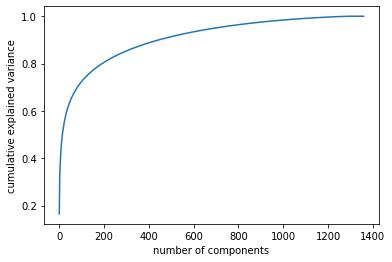

In [ ]:
pca = PCA().fit(x_flatten)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Since nearly 100% variance is attained using 1200 components as seen above, the number of components that will be used to carry out PCA transform of the input data is 1200.

In [ ]:
pca = PCA(n_components=1200)
pca.fit(x_flatten)
X_pca = pca.transform(x_flatten)

Splitting the PCA transformed data into train and test data respectively with a test size of 0.2:

In [ ]:
x_tr_pca,x_test_pca,y_tr_pca,y_test_pca=train_test_split(X_pca,Y,test_size=0.2,random_state=42)

i) Using Logistic Regression on the input data:

In [ ]:
model_lr1=LogisticRegression(C=0.1,max_iter=1000)

In [ ]:
model_lr1.fit(x_tr_pca,y_tr_pca)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Generating the predictions of the test data and obtaining the classification report of test and predicted labels:

In [ ]:
y_pred_pca=model_lr1.predict(x_test_pca)

In [ ]:
print(classification_report(y_pred_pca,y_test_pca))

              precision    recall  f1-score   support

           0       0.31      0.33      0.32        15
           1       0.40      0.33      0.36        18
           2       0.70      0.58      0.64        12
           3       0.36      0.45      0.40        11
           4       0.47      0.41      0.44        17
           5       0.32      0.32      0.32        19
           6       0.43      0.21      0.28        29
           7       0.61      0.69      0.65        16
           8       0.86      0.67      0.75        18
           9       0.40      0.43      0.41        14
          10       0.57      0.62      0.59        13
          11       0.37      0.47      0.41        15
          12       0.65      0.81      0.72        16
          13       0.44      0.70      0.54        10
          14       0.31      0.36      0.33        14
          15       0.47      0.53      0.50        15
          16       0.85      0.85      0.85        20

    accuracy              

As seen above, a drastic reduction in the performance can be seen as compared to the previous implementations.

ii) Using Random Forest Classifier: The model is defined and fit using the training data.

In [ ]:
model_rf1=RandomForestClassifier()

In [ ]:
model_rf1.fit(x_tr_pca,y_tr_pca)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Generating the predictions and the classifciation report of the predicted and test labels:

In [ ]:
y_pred=model_rf1.predict(x_test_pca)

In [ ]:
print(classification_report(y_pred,y_test_pca))

              precision    recall  f1-score   support

           0       0.06      0.06      0.06        18
           1       0.13      0.12      0.12        17
           2       0.60      0.21      0.32        28
           3       0.29      0.27      0.28        15
           4       0.47      0.44      0.45        16
           5       0.16      0.23      0.19        13
           6       0.79      0.34      0.48        32
           7       0.22      0.40      0.29        10
           8       0.36      0.33      0.34        15
           9       0.20      0.38      0.26         8
          10       0.29      0.25      0.27        16
          11       0.37      0.33      0.35        21
          12       0.50      0.62      0.56        16
          13       0.19      0.20      0.19        15
          14       0.12      0.15      0.14        13
          15       0.00      0.00      0.00        10
          16       0.35      0.78      0.48         9

    accuracy              

From the above report it can be seen that the accuracy of 29% is very poor. Thus we can conclude that the features captured using the transfer learning pretrained models proves to be very effective as compared to the actual image input transformed using PCA.

Training neural networks using the flattened image input:

In [4]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,BatchNormalization,Activation,Flatten,MaxPool2D,Input,LeakyReLU

i) Defining the neural network:
The neural network below consists of several hidden layers consisting of 512 and 256 neurons along with batch normalization and dropout layers.

In [ ]:
model2 = Sequential()
model2.add(Reshape((224*224*3,), input_shape=(224,224,3), name='Input_layer'))
model2.add(BatchNormalization()) 
model2.add(Dense(512, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(17, activation='softmax',kernel_regularizer=regularizers.l2(1.5e-5)))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 150528)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150528)            602112    
_________________________________________________________________
dense_41 (Dense)             (None, 512)               77070848  
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)              

In [ ]:
trainX.shape

(1088, 224, 224, 3)

Compiling the model using Adam optimizer with a learning rate of 0.0001 an fitting the model using image data generator:

In [ ]:
aug1 = ImageDataGenerator(#shear_range=0.1, zoom_range=0.1,rotation_range=10, fill_mode="nearest"
     rotation_range=10,width_shift_range=0.1,
height_shift_range=0.1, vertical_flip=True,
horizontal_flip=True)

In [ ]:
model2.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit_generator(aug1.flow(trainX, trainY, batch_size=20),
	validation_data=(valX, valY), epochs=50,
	 verbose=1,use_multiprocessing=False,shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/50
55/55 [==============================] - ETA: 0s - batch: 27.0000 - size: 19.7818 - loss: 9.3687 - acc: 0.1158

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55/55 [==============================] - 48s 818ms/step - batch: 27.0000 - size: 19.7818 - loss: 9.3680 - acc: 0.1158 - val_loss: 5.1733 - val_acc: 0.1250
Epoch 2/50
55/55 [==============================] - 44s 796ms/step - batch: 27.0000 - size: 19.7818 - loss: 8.9260 - acc: 0.1618 - val_loss: 4.1258 - val_acc: 0.1691
Epoch 3/50
55/55 [==============================] - 44s 800ms/step - batch: 27.0000 - size: 19.7818 - loss: 7.4144 - acc: 0.1838 - val_loss: 3.9162 - val_acc: 0.1544
Epoch 4/50
55/55 [==============================] - 56s 1s/step - batch: 27.0000 - size: 19.7818 - loss: 6.4787 - acc: 0.2151 - val_loss: 3.5242 - val_acc: 0.2426
Epoch 5/50
55/55 [==============================] - 44s 803ms/step - batch: 27.0000 - size: 19.7818 - loss: 6.3183 - acc: 0.2022 - val_loss: 3.8930 - val_acc: 0.2132
Epoch 6/50
55/55 [==============================] - 44s 801ms/step - batch: 27.0000 - size: 19.7818 - loss: 5.5442 - acc: 0.2224 - val_loss: 3.5578 - val_acc: 0.2206
Epoch 7/50
55/55 [

In [ ]:
From the above results it can be seen that the accuracy is very poor.

Modifying the above neural network to observe any changes:
The number of neurons in the 1st layer has been increased to 1024 and the dropout has been increased to 0.4 while the batch normalization layers have been removed.

In [9]:
model2 = Sequential()
model2.add(Reshape((224*224*3,), input_shape=(224,224,3), name='Input_layer'))
#model2.add(BatchNormalization()) 
model2.add(Dense(1024, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.4))
#model2.add(BatchNormalization())
model2.add(Dense(512,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(17, activation='softmax',kernel_regularizer=regularizers.l2(1.5e-5)))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              154141696 
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1

Compiling the model using Adam optimizer with a learning rate of 0.0001 and fitting the model using image data generator:

In [11]:
model2.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit_generator(aug1.flow(trainX, trainY, batch_size=20),
	validation_data=(valX, valY), epochs=50,
	 verbose=1,use_multiprocessing=False,shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/50
55/55 [==============================] - ETA: 0s - batch: 27.0000 - size: 19.7818 - loss: 2.1826 - acc: 0.2335

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55/55 [==============================] - 55s 919ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.1826 - acc: 0.2335 - val_loss: 1.8928 - val_acc: 0.2500
Epoch 2/50
55/55 [==============================] - 52s 942ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.0783 - acc: 0.2619 - val_loss: 1.8816 - val_acc: 0.2500
Epoch 3/50
55/55 [==============================] - 51s 930ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.1246 - acc: 0.2445 - val_loss: 1.8687 - val_acc: 0.2941
Epoch 4/50
55/55 [==============================] - 52s 938ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.1274 - acc: 0.2500 - val_loss: 1.7469 - val_acc: 0.3382
Epoch 5/50
55/55 [==============================] - 51s 932ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.1525 - acc: 0.2261 - val_loss: 1.8517 - val_acc: 0.3309
Epoch 6/50
55/55 [==============================] - 51s 927ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.0980 - acc: 0.2426 - val_loss: 1.8237 - val_acc: 0.3456
Epoch 7/50
55/5

In [12]:
model2.evaluate(testX1,testY1)

[1.8077842347762163, 0.375]

From the training results and the model evaluation result above, it can be seen that there has not been much improvement in accuracy and still remains to be poor.

Varying the above network by changing the dropout from 0.4 to 0.3:

In [13]:
model2 = Sequential()
model2.add(Reshape((224*224*3,), input_shape=(224,224,3), name='Input_layer'))
#model2.add(BatchNormalization()) 
model2.add(Dense(1024, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.3))
#model2.add(BatchNormalization())
model2.add(Dense(512,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(17, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 150528)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              154141696 
_________________________________________________________________
activation_5 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

In [14]:
model2.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit_generator(aug1.flow(trainX, trainY, batch_size=20),
	validation_data=(valX, valY), epochs=50,
	 verbose=1,use_multiprocessing=False,shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/50
55/55 [==============================] - ETA: 0s - batch: 27.0000 - size: 19.7818 - loss: 7.7976 - acc: 0.0634

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55/55 [==============================] - 52s 876ms/step - batch: 27.0000 - size: 19.7818 - loss: 7.7980 - acc: 0.0634 - val_loss: 3.1688 - val_acc: 0.1103
Epoch 2/50
55/55 [==============================] - 49s 892ms/step - batch: 27.0000 - size: 19.7818 - loss: 3.5576 - acc: 0.0790 - val_loss: 2.8328 - val_acc: 0.0588
Epoch 3/50
55/55 [==============================] - 49s 889ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.9045 - acc: 0.0892 - val_loss: 2.7416 - val_acc: 0.1765
Epoch 4/50
55/55 [==============================] - 51s 929ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.7788 - acc: 0.0947 - val_loss: 2.7407 - val_acc: 0.1397
Epoch 5/50
55/55 [==============================] - 52s 938ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.7144 - acc: 0.1324 - val_loss: 2.4525 - val_acc: 0.2353
Epoch 6/50
55/55 [==============================] - 51s 926ms/step - batch: 27.0000 - size: 19.7818 - loss: 2.6185 - acc: 0.1636 - val_loss: 2.3676 - val_acc: 0.1912
Epoch 7/50
55/5

In [15]:
model2.evaluate(testX1,testY1)

[1.8773631558698767, 0.2867647]

From the above results it can be seen that the performance is still poor.

In [ ]:
Comparison of the above results:
    i) The transfer learning based models perform the best as compared to the CNN,neural networks and supervised learning algorithms since they make use of great depth in the layers without the vanishing gradient or ecploding gradient problems.
    ii)The best classifier is that of the mobilenet transfer learning model yielding 96% test accuracy. 
    iii)The resnet50 and mobilenet architectures provide very fast training as compared to the other architectures used above. The mobile net making use of depthwise separable convolutions provide the same results as that of traditional convolutions with lesser computations.
    iv)The CNN networks provide average performance as compared to the transfer learning models since unlike the transfer learning models that make use of pretrained weights obtained from training on a larger dataset,CNN as well as Alexnet trained from scratch capture only the features and weights from training on the provided dataset as a result of which performance is poorer as compared to other transfer learning architectures.
    iv)Supervised learning algorithms work very well when trained with the features obtained from the predictions of the base model of transfer learning architectures on the input data.
    v)The neural networks and supervised learning algorithms perform very poor when trained only with the flattened input after applying PCA.
    